# Importation des librairies

In [19]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Téléchargement des données

In [2]:
df = pd.read_csv("/Users/salahabbad/Downloads/Life Style Data/data/Final_data.csv")
df.shape
print(df.head())
print(df.columns)

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624789  0.741237   0.835985   
1     

# Statistiques descriptives et graphiques

In [3]:
df.isnull().values.any()

np.False_

In [4]:
moyenne_age = df['Age'].mean()
nbhomme_femme = df['Gender'].value_counts()
pct_homme = df[df['Gender'] == 'Female']
pct_homme = (pct_homme.shape[0] / df.shape[0]) * 100
pct_femme = 1 - pct_homme
type_entrainement = df['Workout_Type'].value_counts()
pct_gras_moyen = df['Fat_Percentage'].mean()
df_homme = df[df['Gender'] == 'Male']
pct_gras_moyen_homme = df_homme['Fat_Percentage'].mean()
print(type_entrainement)
print(pct_gras_moyen)
df_stat = df.describe().round(2)


Workout_Type
Strength    5071
Yoga        5032
HIIT        4974
Cardio      4923
Name: count, dtype: int64
26.101313358952215


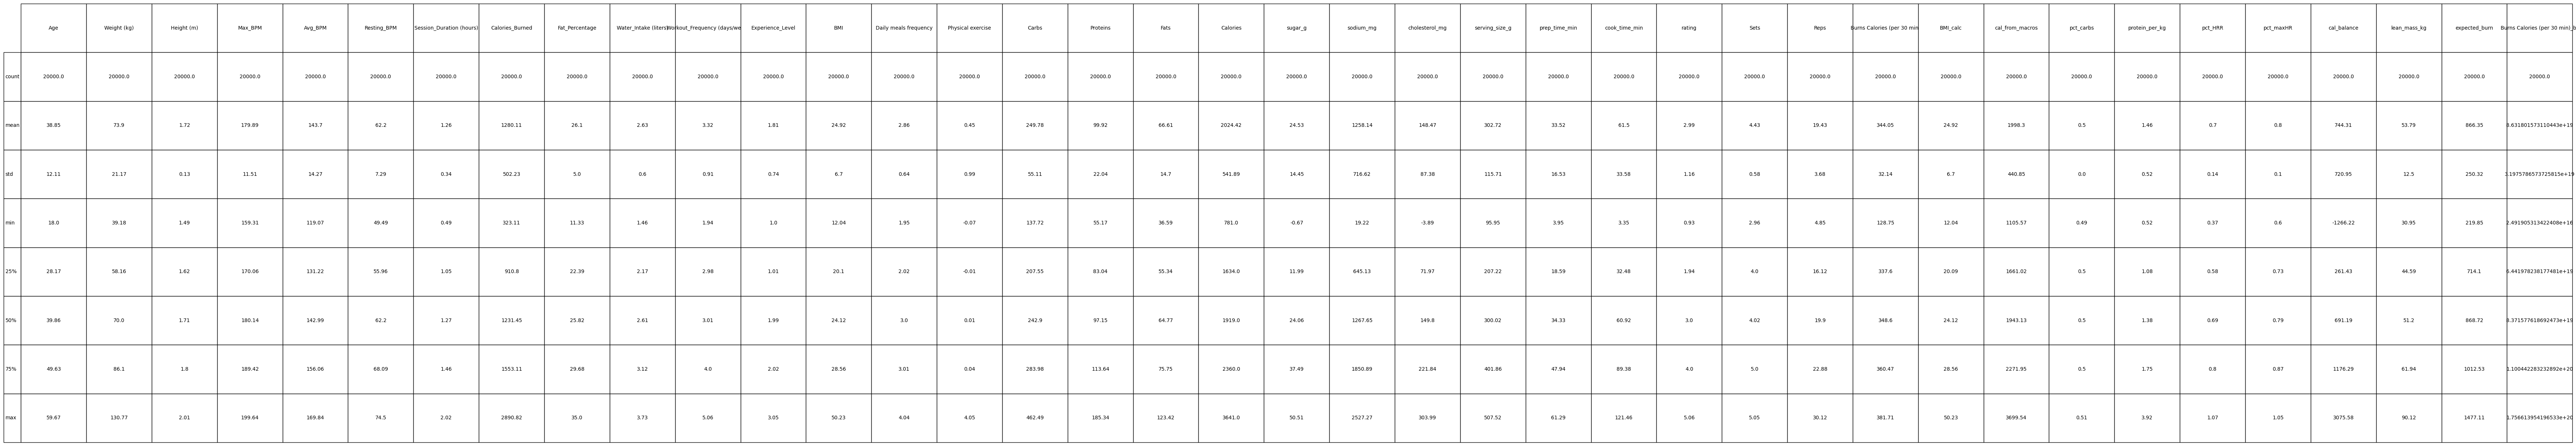

In [5]:
# Création du visuel
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Pas d’axes

# Affichage du tableau
table = ax.table(
    cellText=df_stat.values,
    rowLabels=df_stat.index,
    colLabels=df_stat.columns,
    cellLoc='center',
    loc='center'
)

# Mise en forme
table.scale(15, 8)
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.show()

/var/folders/gj/z9fc5_5j6v35c3w_lzkxp_n00000gn/T/ipykernel_63402/3677376588.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


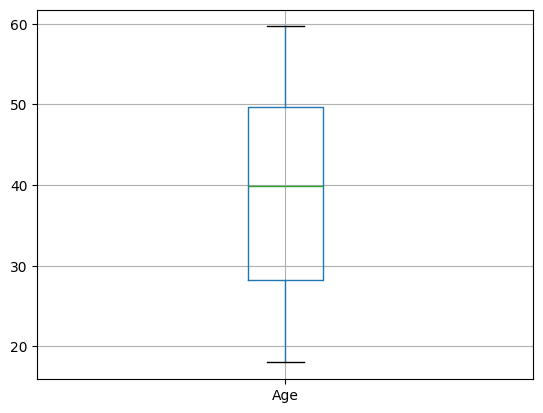

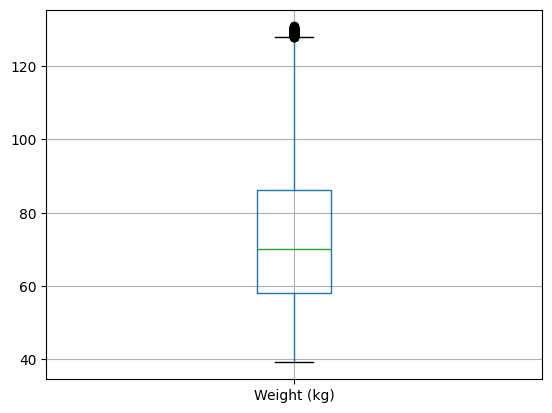

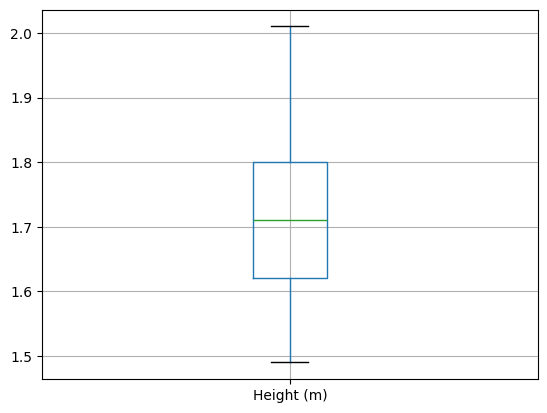

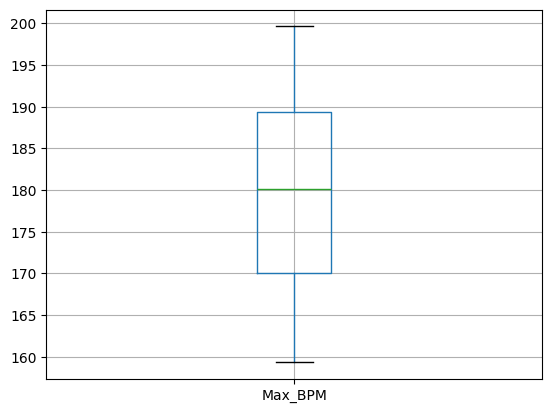

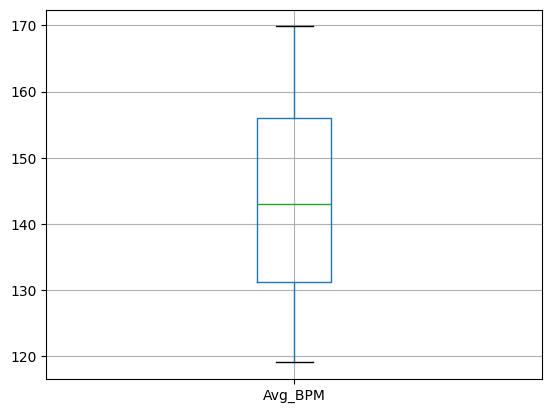

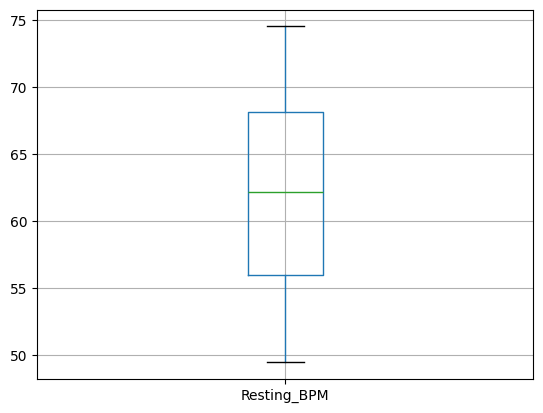

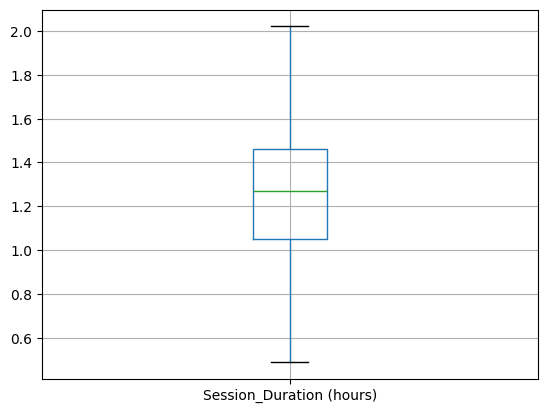

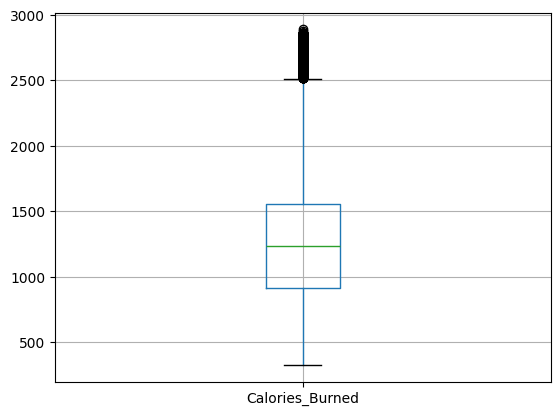

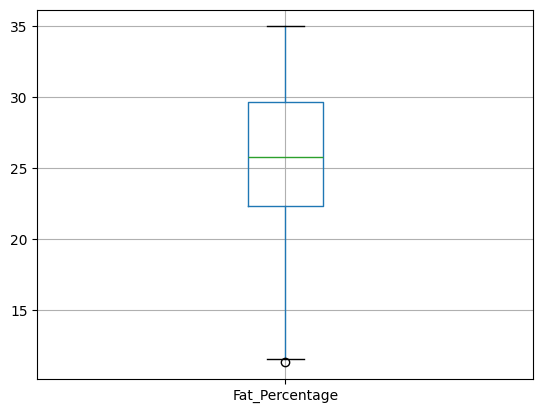

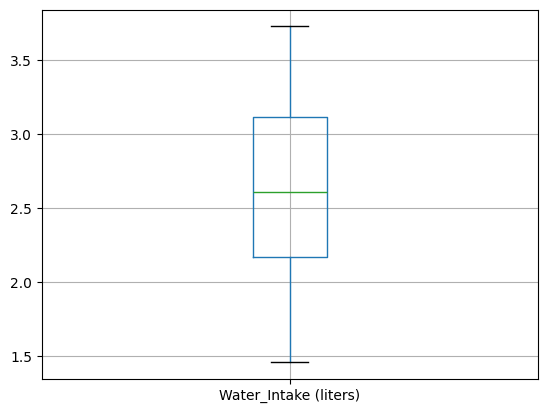

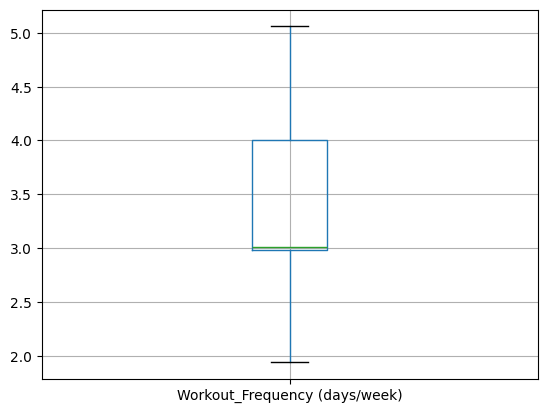

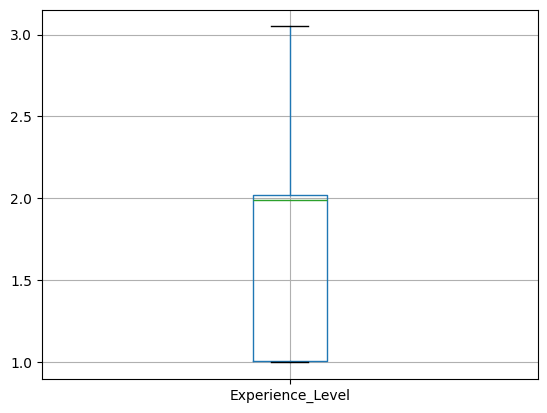

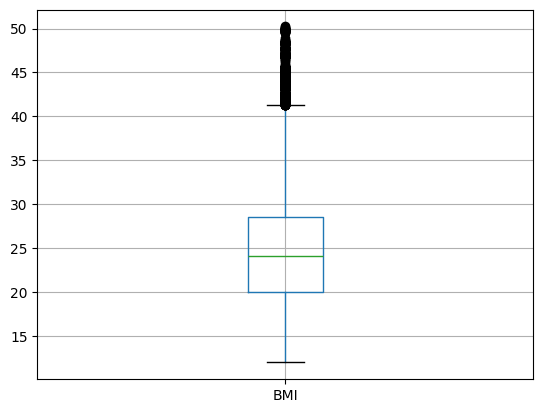

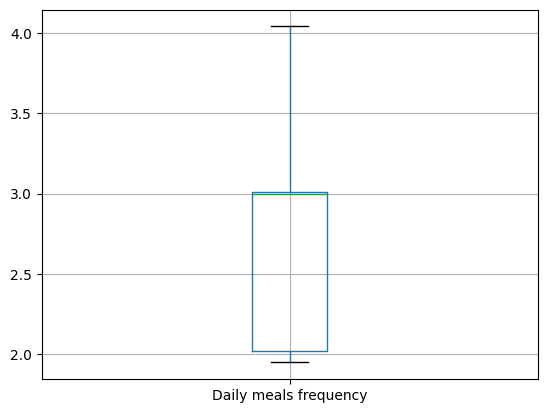

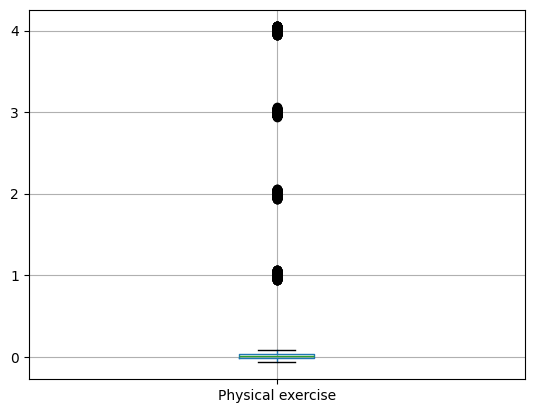

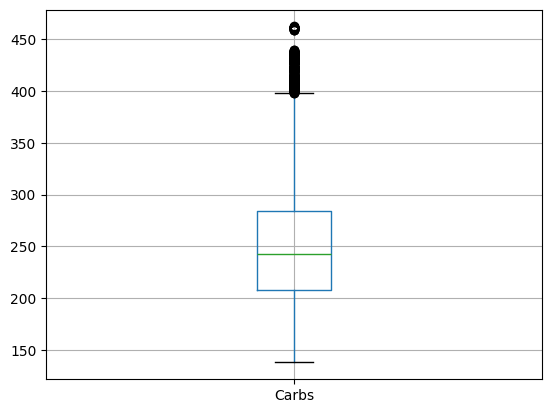

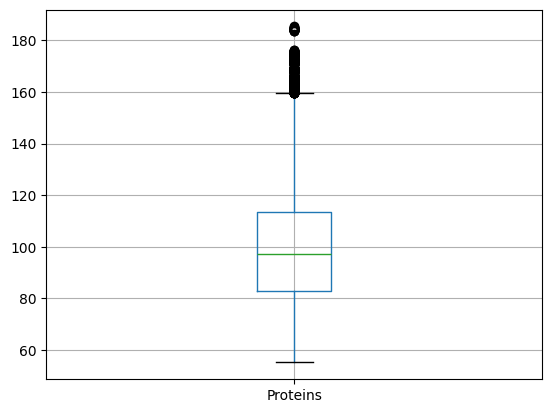

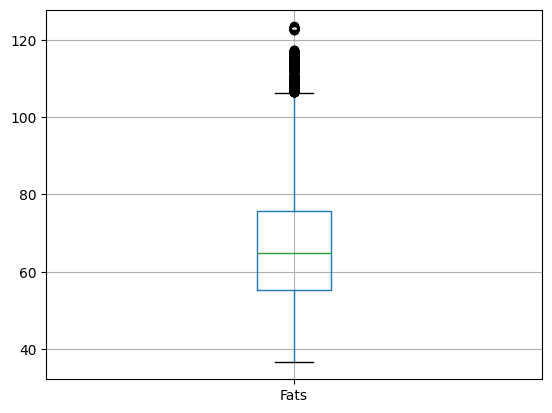

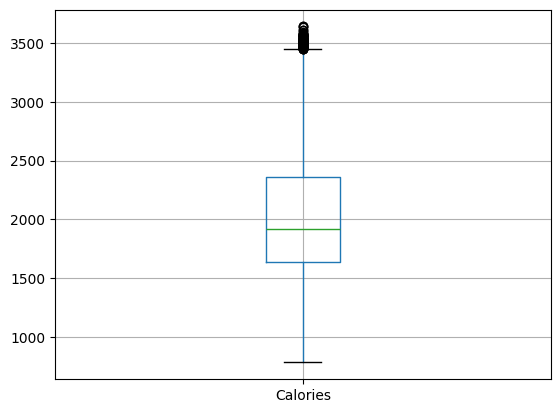

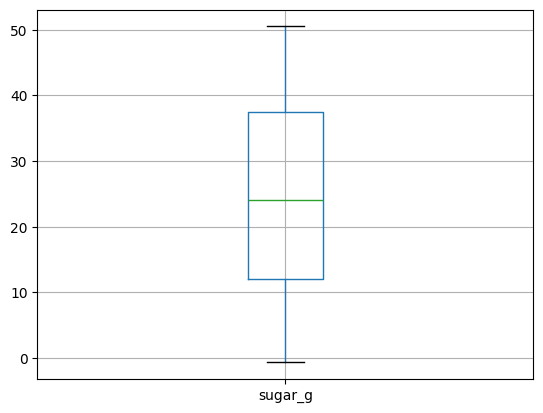

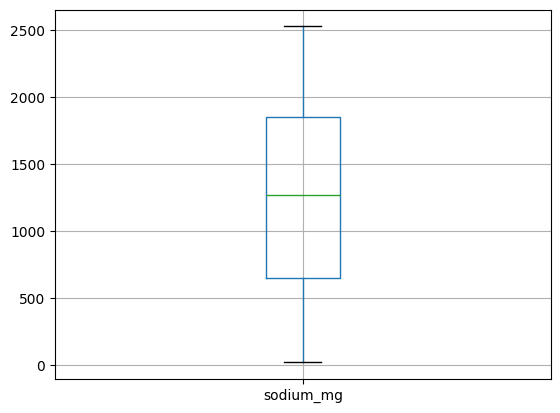

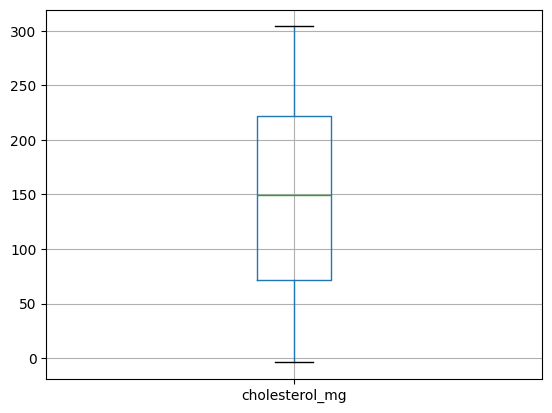

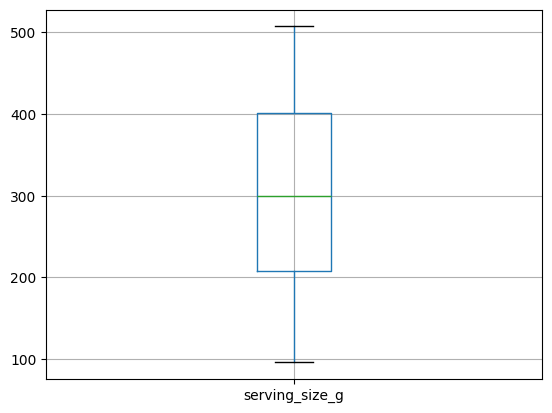

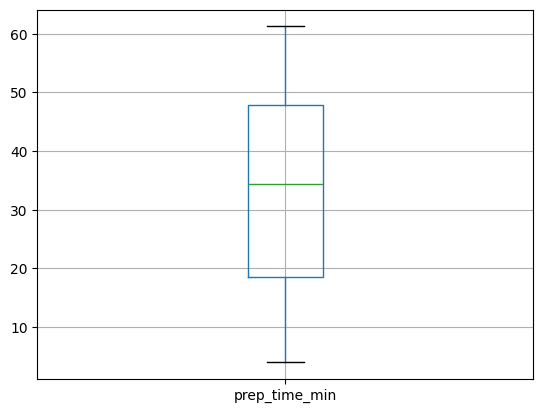

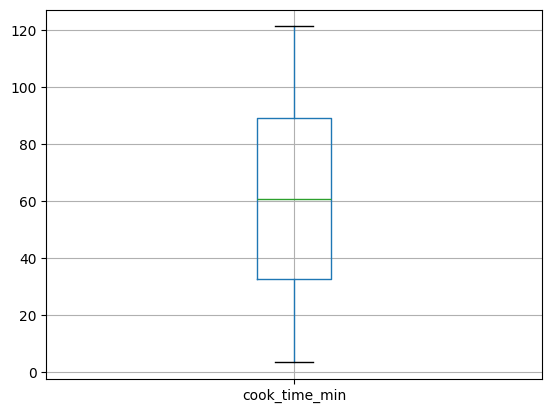

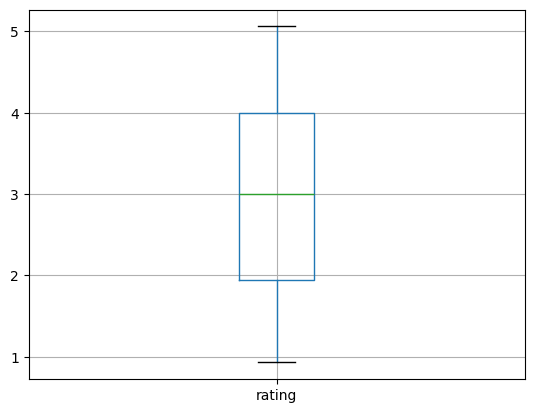

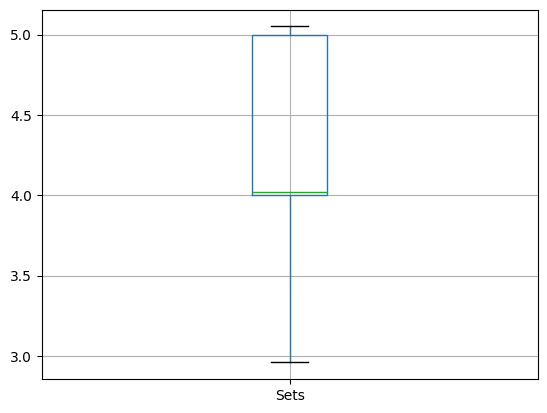

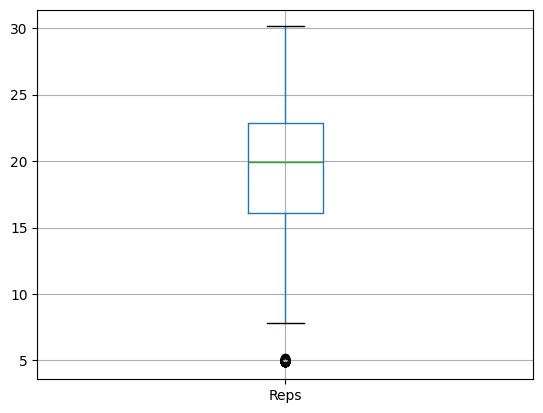

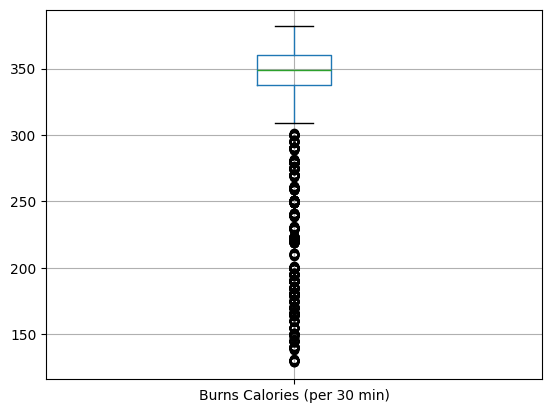

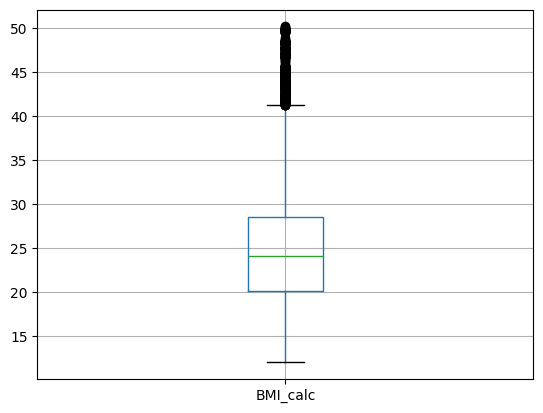

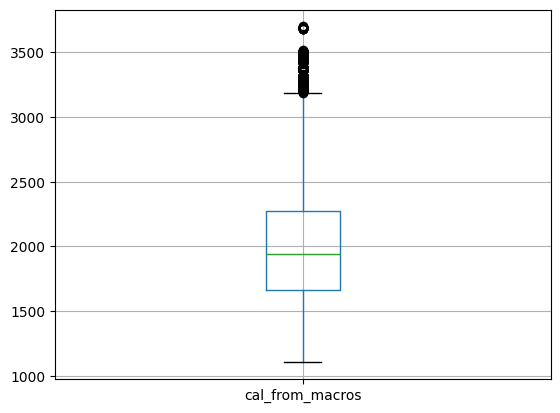

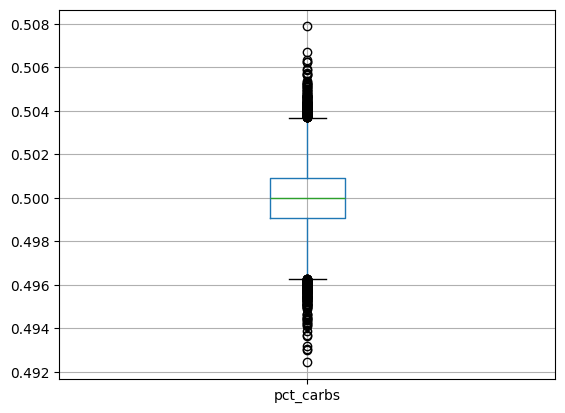

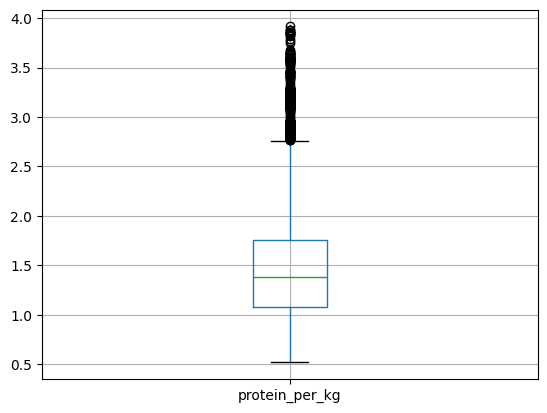

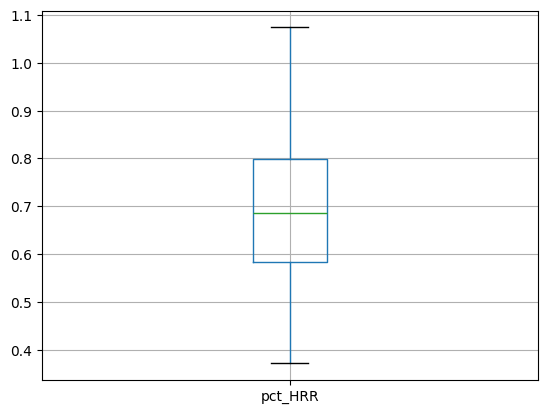

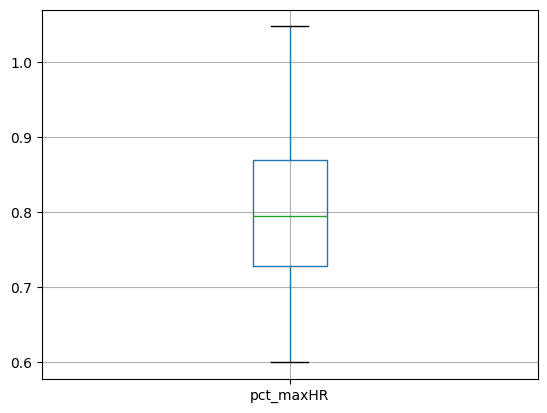

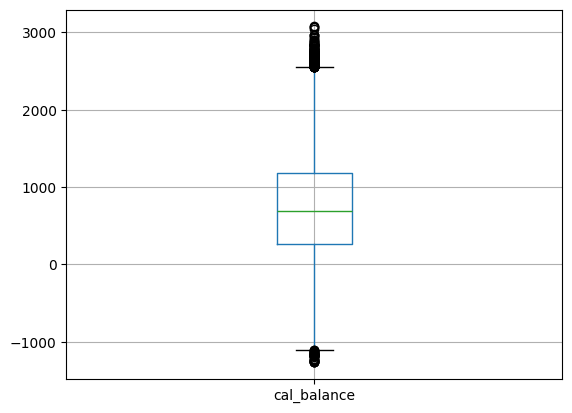

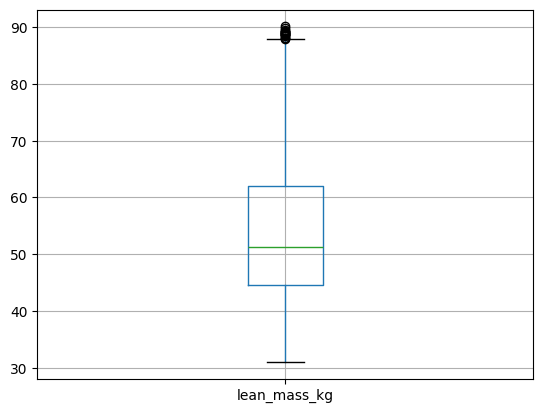

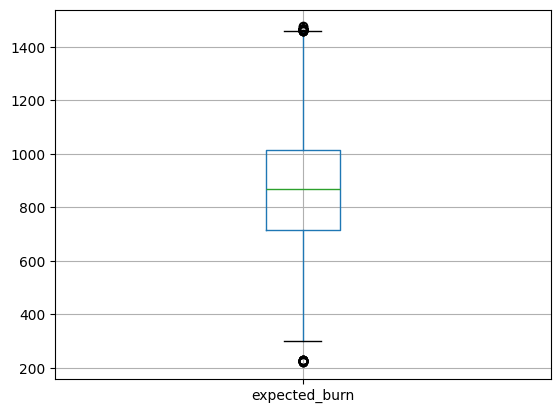

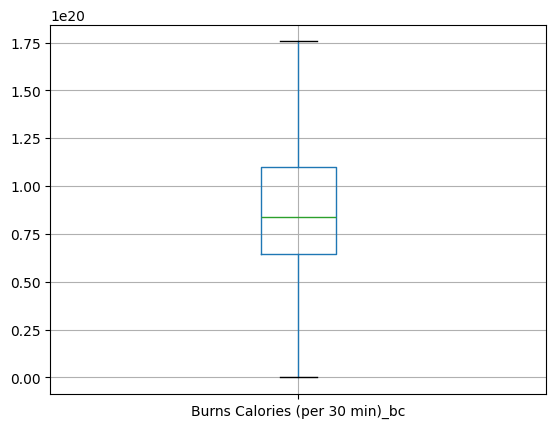

In [6]:
df1=df.select_dtypes(exclude=['object'])

for column in df1:
    plt.figure()
    df.boxplot([column])

plt.show()

# Régression Linéaire pour prédire le poids en fonctions de différents facteurs

[108.69271552  93.66503834  87.82460816 ...  46.0741424   71.37651461
 102.04054251]
0.8443721507019618


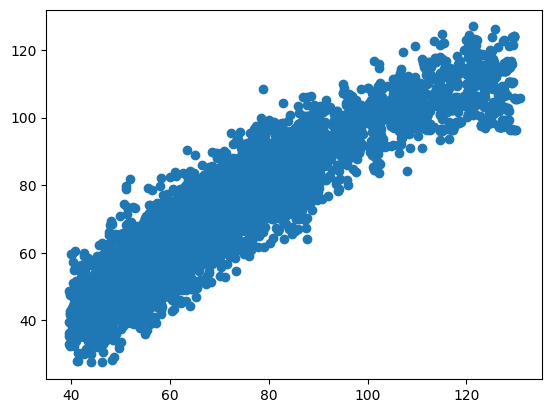

In [7]:
reg_Y = df['Weight (kg)']
reg_X = df[['Fat_Percentage', 'Session_Duration (hours)', 'Calories_Burned', 'Age', 'Proteins', 'Height (m)']]
regression = LinearRegression().fit(reg_X, reg_Y)
X_train, X_test, y_train, y_test = train_test_split(reg_X, reg_Y, test_size=0.3, random_state=42)
y_pred = regression.predict(X_test)
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(y_pred)
print(r2)
plt.scatter(y_test, y_pred)

# Clustering 
Afin de voir si on peut distinguer des groupes d'individus aux caractéristiques similaires

In [8]:
variable_quali = df.select_dtypes(include=['object','category']).columns
indice_quali = [df.columns.get_loc(col) for col in variable_quali]
data = df.to_numpy()
kproto = KPrototypes(n_clusters=4, init='Cao', n_init=5, verbose=2)
clusters = kproto.fit_predict(data, categorical = indice_quali)
print(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 4229, ncost: 3.509078192537636e+42
Run: 1, iteration: 2/100, moves: 2224, ncost: 3.322783644964676e+42
Run: 1, iteration: 3/100, moves: 1772, ncost: 3.131120952557282e+42
Run: 1, iteration: 4/100, moves: 2072, ncost: 2.6714467714434797e+42
Run: 1, iteration: 5/100, moves: 1935, ncost: 1.9794898427652943e+42
Run: 1, iteration: 6/100, moves: 836, ncost: 1.9382949801895575e+42
Run: 1, iteration: 7/100, moves: 607, ncost: 1.917129451146585e+42
Run: 1, iteration: 8/100, moves: 395, ncost: 1.9086744291531104e+42
Run: 1, iteration: 9/100, moves: 281, ncost: 1.9044402203553523e+42
Run: 1, iteration: 10/100, moves: 143, ncost: 1.9033017992338755e+42
Run: 1, iteration: 11/100, moves: 80, ncost: 1.9028714833315844e+42
Run: 1, iteration: 12/100, moves: 57, ncost: 1.902694696003594e+42
Run: 1, iteration: 13/100, 


Centroïdes des clusters :
[['37.96859477124202' '77.19086056644855' '1.7122766884532274'
  '180.70045751634296' '149.1536383442248' '60.719488017428255'
  '1.261296296296286' '1234.8963834422752' '26.89341871771886'
  '2.643801742919407' '3.0493899782134797' '1.5716884531590265'
  '26.22149237472761' '2.7248801742919126' '0.44938997821349713'
  '260.11242919390315' '104.05203703703435' '69.36949891067614'
  '2094.2047930283225' '27.835664488018434' '1349.6513943354776'
  '157.63096949891383' '325.8562418300695' '38.87141612200503'
  '66.8032352941168' '3.0442265795207177' '3.0699999999999976'
  '12.840305010892791' '218.11389978213612' '26.22154046165221'
  '2080.9833551198317' '0.4999837092272626' '1.5054247672943655'
  '0.7429540375675108' '0.8283363861379419' '859.308409586077'
  '55.20398731138524' '549.9206002178734' '5.408506404335124e+18' 'Male'
  'Yoga' 'Other' 'Breakfast' 'Vegan' 'Roasted' 'Plyo Squats'
  'Targets lower abs' 'Lower Chest, Triceps' 'Wall' 'Intermediate' 'Back'

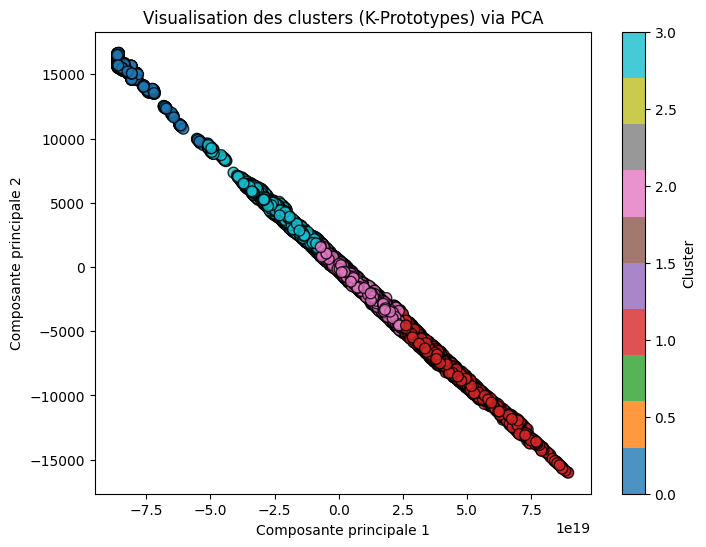

In [9]:
df['cluster'] = clusters  # ajout de la colonne cluster

print("\nCentroïdes des clusters :")
print(kproto.cluster_centroids_)

# --- Étape 3 : encodage des variables catégorielles pour la PCA ---
df_encoded = pd.get_dummies(df.drop('cluster', axis=1))

# --- Étape 4 : réduction de dimension (PCA) ---
pca = PCA(n_components=2)
components = pca.fit_transform(df_encoded)

# --- Étape 5 : visualisation graphique ---
plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], c=df['cluster'], cmap='tab10', s=60, alpha=0.8, edgecolor='k')
plt.title('Visualisation des clusters (K-Prototypes) via PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cluster')
plt.show()

# Que peut-on en dire ?
Et bien on peut voir ici que nous avons 4 groupes d'individus (que nous avons défini tel quel) il serait désormais intéressant de s'intéresser au nombre d'individus dans chaque groupe et au caractéristique de chaque groupe pour bien les définir, visuellement nous pouvons voir que le groupe en haut a gauche à l'air inférieur numériquement aux autres, cherchons a savoir pourquoi et qu'est ce que cela peut nous raconter

In [28]:
cluster_summary = df.groupby('cluster').mean(numeric_only=True)
difference = (cluster_summary.max() - cluster_summary.min())/cluster_summary.mean()
variables_significatives = difference[difference > 0.10].index
print(cluster_summary[variables_significatives])



         Weight (kg)  Experience_Level        BMI  Physical exercise  \
cluster                                                                
0          77.190861          1.571688  26.221492           0.449390   
1          81.920664          1.759374  27.147804           0.618678   
2          74.420434          1.873360  24.913819           0.366127   
3          68.089504          1.816481  23.386909           0.418463   

            Calories    sugar_g    sodium_mg  cholesterol_mg  serving_size_g  \
cluster                                                                        
0        2094.204793  27.835664  1349.651394      157.630969      325.856242   
1        2225.272412  23.529580  1298.998871      137.811822      312.203001   
2        2038.721553  24.446076  1214.856536      155.691274      292.073436   
3        1879.439980  24.838477  1256.686546      148.247007      302.642196   

         prep_time_min  cook_time_min      Sets       Reps  \
cluster                 